In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor #this is a regression problem
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset using panda

gold_value = pd.read_csv("../input/gold-data-test/CombinedGoldDataCleaned.csv")
gold_value

,Month,Price,Export - Swiztzerland,Import - UK
0,1/1/1996,399.45,1.46,0.98
1,2/1/1996,404.76,1.46,0.98
2,3/1/1996,396.21,1.46,0.98
3,4/1/1996,392.85,1.46,0.98
4,5/1/1996,391.93,1.46,0.98
...,...,...,...,...
295,8/1/2020,1968.63,1.19,0.47
296,9/1/2020,1921.92,1.19,0.47
297,10/1/2020,1900.27,1.19,0.47
298,11/1/2020,1866.30,1.19,0.47


# Analzing the dataset

In [3]:
gold_value.shape

(300, 4)

In [4]:
gold_value.dtypes

Month                     object
Price                    float64
Export - Swiztzerland    float64
Import - UK              float64
dtype: object

In [5]:
gold_value.isna().sum()

Month                    0
Price                    0
Export - Swiztzerland    0
Import - UK              0
dtype: int64

In [6]:
gold_value.describe()

,Price,Export - Swiztzerland,Import - UK
count,300.000000,300.00000,300.000000
mean,870.185300,1.34960,0.536400
std,507.656772,0.11433,0.295136
min,256.080000,1.19000,0.080000
25%,355.537500,1.26000,0.360000
50%,873.675000,1.32000,0.490000
75%,1284.155000,1.44000,0.680000
max,1968.630000,1.58000,1.040000


In [7]:
corr1 = gold_value.corr(method='pearson')
corr1

,Price,Export - Swiztzerland,Import - UK
Price,1.000000,-0.397430,-0.512037
Export - Swiztzerland,-0.397430,1.000000,0.728343
Import - UK,-0.512037,0.728343,1.000000


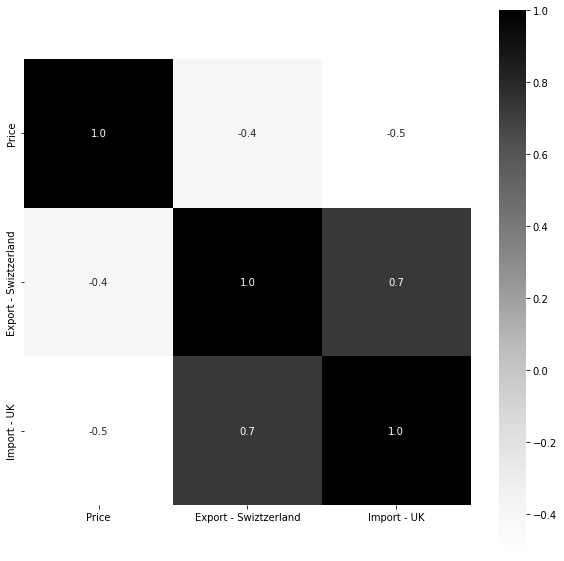

In [8]:
#heatmap
plt.figure(figsize = (10,10))
sns.heatmap(corr1, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':10}, cmap='Greys');

In [9]:
corr1['Price']

Price                    1.000000
Export - Swiztzerland   -0.397430
Import - UK             -0.512037
Name: Price, dtype: float64

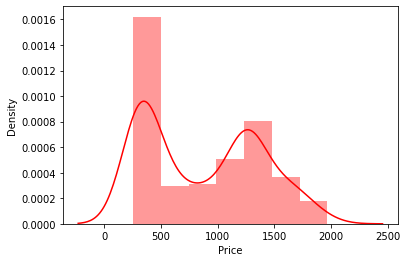

In [10]:
sns.distplot(gold_value['Price'],color='red');

In [11]:
#Find features with one value
for column in gold_value.columns:
    print(column, gold_value[column].nunique())

Month 300
Price 300
Export - Swiztzerland 18
Import - UK 21


In [12]:
categorical_features = [feature for feature in gold_value.columns if ((gold_value[feature].dtypes=='O') & (feature not in ['Price']))]
categorical_features

['Month']

In [13]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(gold_value[feature].unique())))

The feature is Month and number of categories are 300


In [14]:
numerical_features = [feature for feature in gold_value.columns if ((gold_value[feature].dtypes != 'O') & (feature not in ['Price']))]
print('Number of numerical variables: ', len(numerical_features))
gold_value[numerical_features].head()

Number of numerical variables:  2


,Export - Swiztzerland,Import - UK
0,1.46,0.98
1,1.46,0.98
2,1.46,0.98
3,1.46,0.98
4,1.46,0.98


In [15]:
discrete_feature = [feature for feature in numerical_features if len(gold_value[feature].unique())<25]
print('Discrete variables count: {}'.format(len(discrete_feature)))

Discrete variables count: 2


In [16]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['Price']]
print("Continuous feature count {}".format(len(continuous_features)))

Continuous feature count 0


In [17]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(gold_value[continuous_feature])
    plotnumber+=1
plt.show()

<Figure size 1440x4320 with 0 Axes>

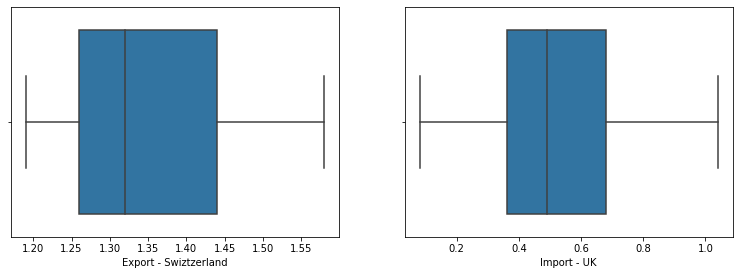

In [18]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(gold_value[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

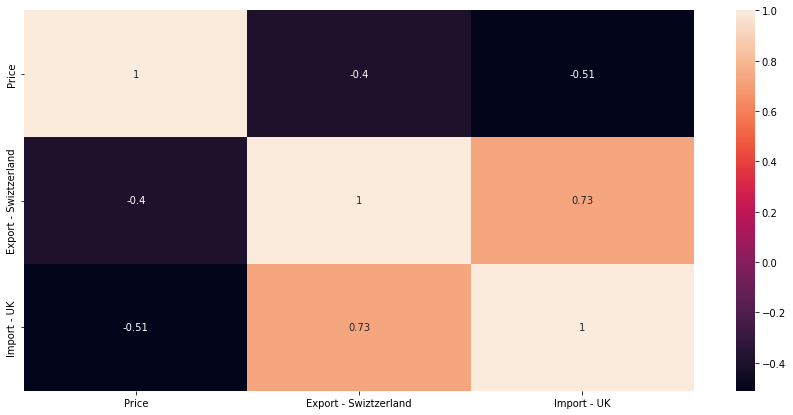

In [19]:
cor_mat = gold_value.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat, annot=True)
plt.show()

In [20]:
print(cor_mat['Price'].sort_values(ascending=False), '\n')

Price                    1.000000
Export - Swiztzerland   -0.397430
Import - UK             -0.512037
Name: Price, dtype: float64 



In [21]:
x = gold_value.drop(['Month','Price'],axis=1)
x

,Export - Swiztzerland,Import - UK
0,1.46,0.98
1,1.46,0.98
2,1.46,0.98
3,1.46,0.98
4,1.46,0.98
...,...,...
295,1.19,0.47
296,1.19,0.47
297,1.19,0.47
298,1.19,0.47


In [22]:
y = gold_value["Price"]
y

0       399.45
1       404.76
2       396.21
3       392.85
4       391.93
        ...   
295    1968.63
296    1921.92
297    1900.27
298    1866.30
299    1858.42
Name: Price, Length: 300, dtype: float64

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [24]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [25]:
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'RandomForestRegressor': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50 , 100, 130],
                'criterion': ['mse'],
                'max_depth': range(2,4,1),
                'max_features': ['auto', 'log2']
            }
        },
        'XGBRegressor': {
            'model': XGBRegressor(),
            'params': {
                'learning_rate': [0.5, 0.1, 0.01],
                'max_depth': [2,3],
                'n_estimators': [10, 50, 100, 200]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', ' best_score', 'best_params'])

In [26]:
pd.set_option('display.max_colwidth', 100)
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,decision_tree,NaN,"{'criterion': 'mse', 'splitter': 'best'}"
1,RandomForestRegressor,NaN,"{'criterion': 'mse', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 100}"
2,XGBRegressor,NaN,"{'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}"


In [27]:
model_xgb = XGBRegressor()

In [28]:
model_xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [29]:
model_xgb.score(x_test, y_test)

0.975354056162952

In [30]:
y_pred = model_xgb.predict(x_test)

In [31]:
y_pred

array([ 410.06198, 1258.9114 , 1595.7488 , 1258.9114 ,  286.84882,
       1258.9114 ,  355.3612 ,  355.3612 , 1159.1971 ,  362.40326,
       1384.0355 ,  595.75793,  286.84882, 1268.2281 ,  451.06992,
        362.40326,  410.06198,  699.30975,  879.53015,  362.40326,
        286.84882,  355.3612 , 1233.5153 , 1233.5153 , 1455.2036 ,
        362.40326, 1663.8132 , 1663.8132 , 1278.4397 , 1384.0355 ,
        595.75793, 1455.2036 , 1278.4397 ,  983.9731 , 1233.5153 ,
       1233.5153 , 1268.2281 , 1791.3728 ,  310.44183,  451.06992,
        879.53015,  275.21844,  286.84882,  355.3612 , 1791.3728 ,
       1268.2281 ,  595.75793,  451.06992,  310.44183, 1233.5153 ,
       1159.1971 , 1278.4397 ,  699.30975, 1455.2036 ,  879.53015,
        355.3612 ,  983.9731 , 1663.8132 , 1159.1971 , 1595.7488 ],
      dtype=float32)

In [32]:
y_test

98      406.67
259    1283.04
184    1512.58
256    1246.04
29      292.32
254    1231.42
7       387.35
13      346.58
230    1178.63
91      359.77
284    1510.58
127     632.59
30      292.87
241    1199.50
113     430.66
84      356.86
99      403.26
140     712.65
144     889.60
94      389.91
35      291.68
3       392.85
173    1232.92
175    1215.81
215    1221.51
89      356.35
203    1684.76
193    1744.82
266    1324.66
281    1359.04
131     629.79
209    1343.35
271    1201.71
161     945.67
176    1270.98
174    1192.97
245    1276.40
289    1597.10
74      294.06
109     423.35
155     816.09
65      270.23
41      261.31
11      369.00
293    1732.22
240    1097.91
130     627.83
114     424.48
77      321.18
171    1148.69
235    1117.93
272    1198.39
134     654.90
214    1275.86
151     839.03
10      377.85
159     890.20
199    1630.31
232    1198.63
180    1360.46
Name: Price, dtype: float64

In [33]:
model = RandomForestRegressor()

In [34]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
model.score(x_train,y_train)

0.9832733943617047

In [36]:
gold_prediction = model.predict(x_test)
gold_prediction

array([ 410.25548701, 1262.05532706, 1603.00605693, 1262.05532706,
        286.74217518, 1262.05532706,  355.06556176,  355.06556176,
       1162.29084691,  362.41942756, 1384.42558966,  595.88973567,
        286.74217518, 1267.84629744,  452.75062563,  362.41942756,
        410.25548701,  697.35166045,  876.27664493,  362.41942756,
        286.74217518,  355.06556176, 1241.19259103, 1241.19259103,
       1455.02368484,  362.41942756, 1661.64281208, 1661.64281208,
       1278.24266775, 1384.42558966,  595.88973567, 1455.02368484,
       1278.24266775,  987.5917047 , 1241.19259103, 1241.19259103,
       1267.84629744, 1797.48295125,  310.12806641,  452.75062563,
        876.27664493,  274.74513898,  286.74217518,  355.06556176,
       1797.48295125, 1267.84629744,  595.88973567,  452.75062563,
        310.12806641, 1241.19259103, 1162.29084691, 1278.24266775,
        697.35166045, 1455.02368484,  876.27664493,  355.06556176,
        987.5917047 , 1661.64281208, 1162.29084691, 1603.00605

In [37]:
error_score = metrics.r2_score(y_test,gold_prediction)
print("R squared : ",error_score)

R squared :  0.9745636529661112


In [38]:
y_test1 = list(y_test)

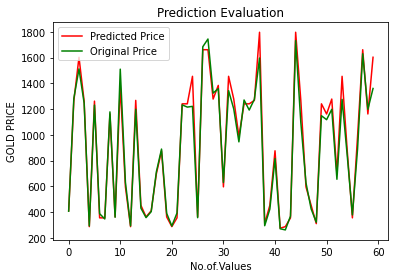

In [39]:
plt.plot(gold_prediction,color="red",label="Predicted Price")
plt.plot(y_test1,color="green",label="Original Price")
plt.title("Prediction Evaluation")
plt.xlabel('No.of.Values')
plt.ylabel('GOLD PRICE')
plt.legend()
plt.show()

In [40]:
model.score(x_test,y_test)

0.9745636529661112